In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats as st
import math as math
from scipy import stats as st
import plotly.express as px

from matplotlib import pyplot as plt
plt.style.use('seaborn-pastel')

import seaborn as sns
sns.set_palette('pastel') 


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [39]:
#reading in df
df = pd.read_csv('Animation_Movies.csv')

In [40]:
#looking at top 5 rows 
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,175000000,http://movies.disney.com/inside-out,tt2096673,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,175000000,http://disney.go.com/disneypictures/up/,tt1049413,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,94000000,http://movies.disney.com/finding-nemo,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,175000000,https://www.pixar.com/feature-films/coco,tt2380307,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,180000000,https://www.pixar.com/feature-films/walle/,tt0910970,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

In [42]:
df.duplicated().sum()

0

In [43]:
#looking at columns with missing values
df.isnull().sum()

id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

In [44]:
#looking at total rows and columns
df.shape

(51945, 23)

In [45]:
#length of df 
len(df)

51945

In [46]:
#percentage of missing data in release_date 
df['release_date'].isnull().sum()/len(df) *100

4.113966695543363

In [47]:
#percentage of missing data in production_companies
df['production_companies'].isnull().sum()/len(df) *100

43.40552507459813

In [48]:
#percentage of missing data in production_countries
df['production_countries'].isnull().sum()/len(df) *100

23.57300991433247

In [49]:
#percentage of missing data in spoken_languages
df['spoken_languages'].isnull().sum()/len(df) *100

34.896525170853785

In [50]:
#unique languages
df['original_language'].unique()

array(['en', 'ja', 'fr', 'he', 'it', 'es', 'zh', 'pl', 'uk', 'ko', 'da',
       'ru', 'de', 'cs', 'pt', 'xx', 'tr', 'fi', 'hu', 'no', 'fa', 'dz',
       'sr', 'th', 'is', 'sv', 'nl', 'la', 'eu', 'hi', 'ta', 'ar', 'sk',
       'cn', 'gl', 'sh', 'lv', 'ms', 'et', 'el', 'nb', 'mo', 'hr', 'ur',
       'pa', 'tl', 'ro', 'sl', 'ca', 'iu', 'hy', 'bg', 'ga', 'si', 'id',
       'uz', 'mi', 'bn', 'lt', 'sq', 'os', 'bs', 'mn', 'ml', 'sa', 'ab',
       'te', 'be', 'vi', 'zu', 'ku', 'ka', 'nn', 'oc', 'as', 'mk', 'ht',
       'sw', 'cy', 'af', 'cr', 'gn', 'mr', 'qu', 'ha', 'yi', 'st', 'kk',
       'az', 'my', 'am', 'mg', 'bo', 'se', 'jv', 'ch', 'kl', 'gd', 'lb',
       'tk', 'so', 'ne'], dtype=object)

In [51]:
#unique spoken_languages. To decide to analyze later or not 
df['spoken_languages'].unique()

array(['English', 'English, Spanish', 'French, English',
       'English, French', 'Japanese', 'English, Japanese, Spanish',
       'English, Italian, Japanese, Yiddish',
       'English, French, German, Portuguese, Spanish',
       'English, Mandarin', 'Spanish, English', 'English, Italian',
       'English, French, German, Italian, Japanese',
       'English, Spanish, Greek', 'English, Portuguese',
       'Croatian, English, Inuktitut', 'English, Russian, French',
       'English, French, Latin', 'Latin, English',
       'Cantonese, Mandarin, Korean, French, English',
       'English, Japanese', 'English, Hindi, Italian, Spanish',
       'English, French, Spanish', 'English, Spanish, French, Japanese',
       'Hebrew, English', 'English, Northern Sami',
       'French, German, Italian, Japanese', 'Mandarin, English',
       'English, Yiddish', 'Persian, French, German',
       'English, Latin, Spanish', 'French, English, Portuguese',
       'Portuguese, English', 'English, Galician, 

In [52]:
#list of columns to drop 
columns_to_drop = ['backdrop_path', 'homepage', 'imdb_id', 'overview', 'original_title', 'poster_path', 'tagline', 'spoken_languages']

#drop specified columns in-place
df.drop(columns=columns_to_drop, inplace=True)

In [53]:
#looking at new df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   budget                51945 non-null  int64  
 10  original_language     51945 non-null  object 
 11  popularity            51945 non-null  float64
 12  genres                51945 non-null  object 
 13  production_companies  29398 non-null  object 
 14  production_countries  39700 non-null  object 
dtypes: bool(1), float64

In [54]:
# Drop rows with null values in the "release_date" column
df.dropna(subset=['release_date'], inplace=True)

In [55]:
# Drop rows with null values in the "title" column
df.dropna(subset=['title'], inplace=True)

In [56]:
#looking at nulls again 
df.isnull().sum()

id                          0
title                       0
vote_average                0
vote_count                  0
status                      0
release_date                0
revenue                     0
runtime                     0
adult                       0
budget                      0
original_language           0
popularity                  0
genres                      0
production_companies    21189
production_countries    11041
dtype: int64

In [57]:
# 43% of the rows in this column are missing, we cannot drop it. filling in missing values with "not listed"
df['production_companies'] = df['production_companies'].fillna('not listed')

In [58]:
# 24% of the rows in this column are missing, we cannot drop it. filling in missing values with "not listed"
df['production_countries'] = df['production_countries'].fillna('not listed')

In [59]:
#making sure there are no missing values
df.isnull().sum()

id                      0
title                   0
vote_average            0
vote_count              0
status                  0
release_date            0
revenue                 0
runtime                 0
adult                   0
budget                  0
original_language       0
popularity              0
genres                  0
production_companies    0
production_countries    0
dtype: int64

In [60]:
#looking at min release date
df['release_date'].min()

'1878-05-07'

In [61]:
#looking at max release date
df['release_date'].max()

'2026-12-31'

In [62]:
#looking for duplicates
df.duplicated().sum()

0

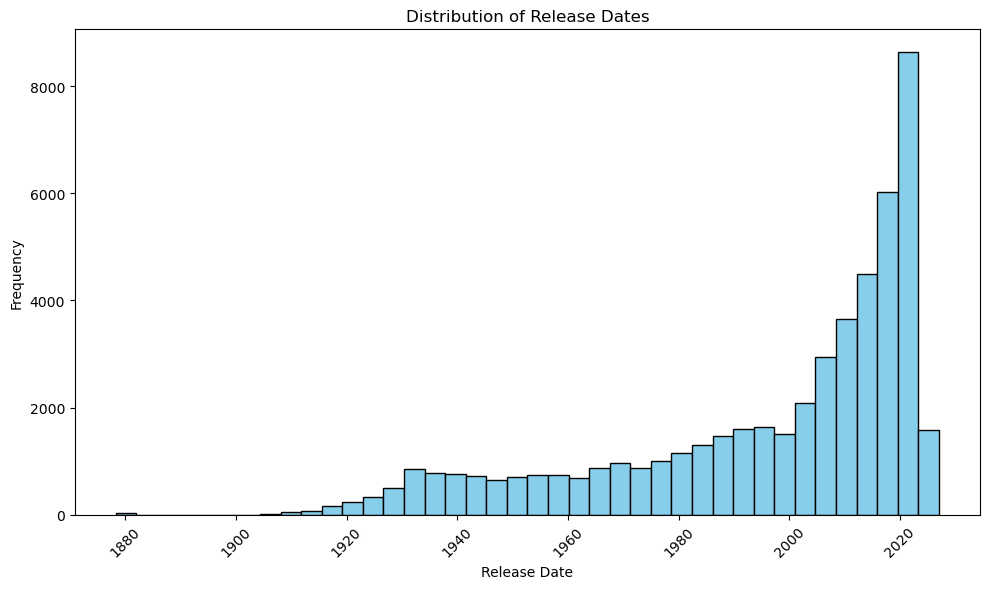

In [63]:
#looking at release date distribution
# Convert release_date column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Plot histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['release_date'], bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Dates')
plt.xlabel('Release Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Animated movies really started to gain popularity in the early 2000s. 

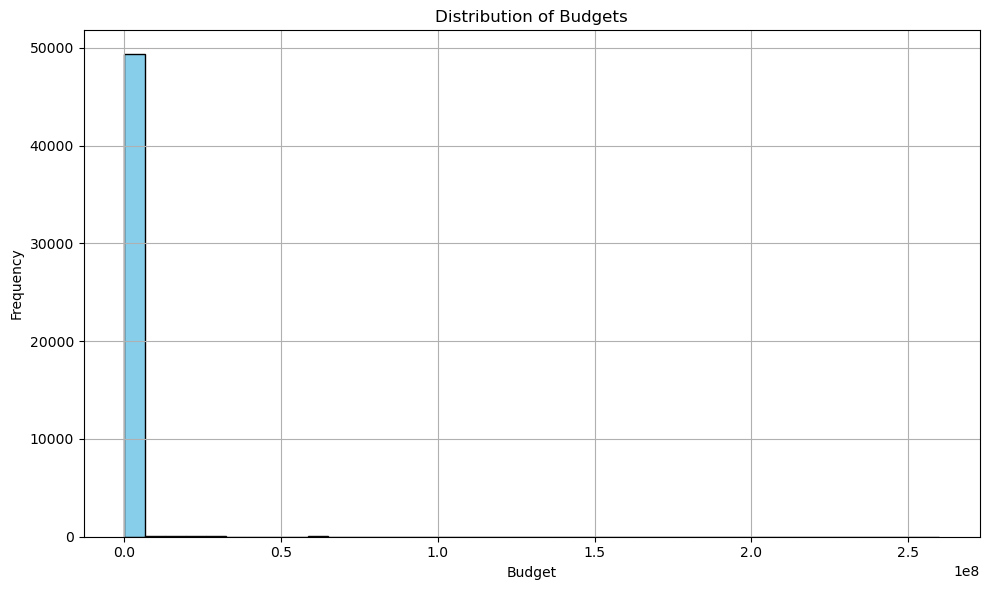

In [64]:
# Plot histogram of budgets using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['budget'], bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()
plt.show()

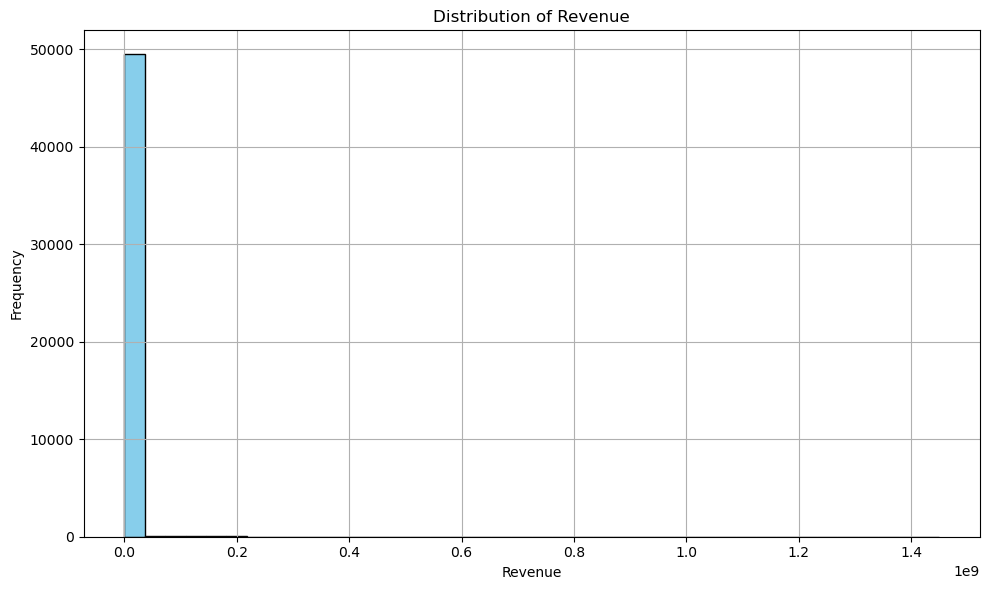

In [65]:
# Plot histogram of revenue using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['revenue'], bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()
plt.show()

In [66]:
#looking at unique genres
df['genres'].unique()

array(['Animation, Family, Adventure, Drama, Comedy',
       'Animation, Comedy, Family, Adventure', 'Animation, Family', ...,
       'Animation, Fantasy, TV Movie, Family',
       'Drama, Comedy, Adventure, Animation, Fantasy, TV Movie, Family',
       'Drama, Comedy, Documentary, History, Animation'], dtype=object)

There are many films with "Animation" genre, but since this is a dataset of animated movies, we will drop the genre "Animation" and obtain the first genre, then drop the rest. 

In [30]:
# Convert column to string type
df['genres'] = df['genres'].astype(str)

# Function to extract first non-"Animation" word
def extract_first_word(genre):
    genres_list = genre.split(',')
    for word in genres_list:
        if word.strip() != 'Animation':
            return word.strip()
    return None  # Return None if only "Animation" is present or if the genre is empty

# Apply the function to the 'genres' column
df['genres'] = df['genres'].apply(extract_first_word)


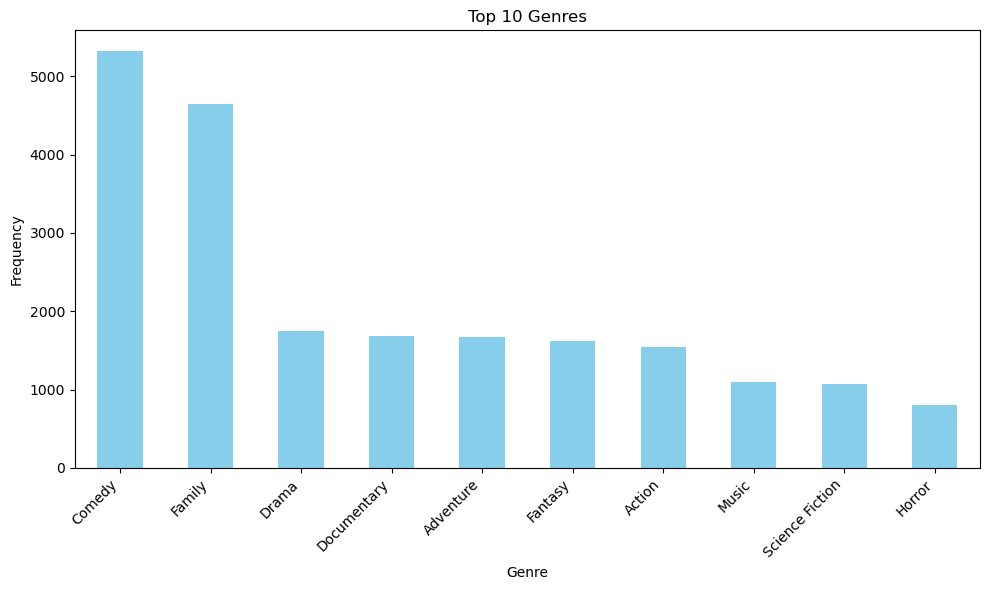

In [31]:
#looking at value counts of genres
top_ten_genres = df['genres'].value_counts().head(10)

# Plot the frequencies of the top 10 genres
plt.figure(figsize=(10, 6))
top_ten_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
df['production_companies'].unique()

array(['Pixar, Walt Disney Pictures', 'Pixar',
       'Walt Disney Pictures, Walt Disney Feature Animation', ...,
       'ANIMA LATINA',
       'Benesse, Sony Music Direct, TOHO, The Answer Studio, Backstreets Inc., TV Setouchi Broadcasting (TSC)',
       'Studio Neum, Zagreb Film'], dtype=object)

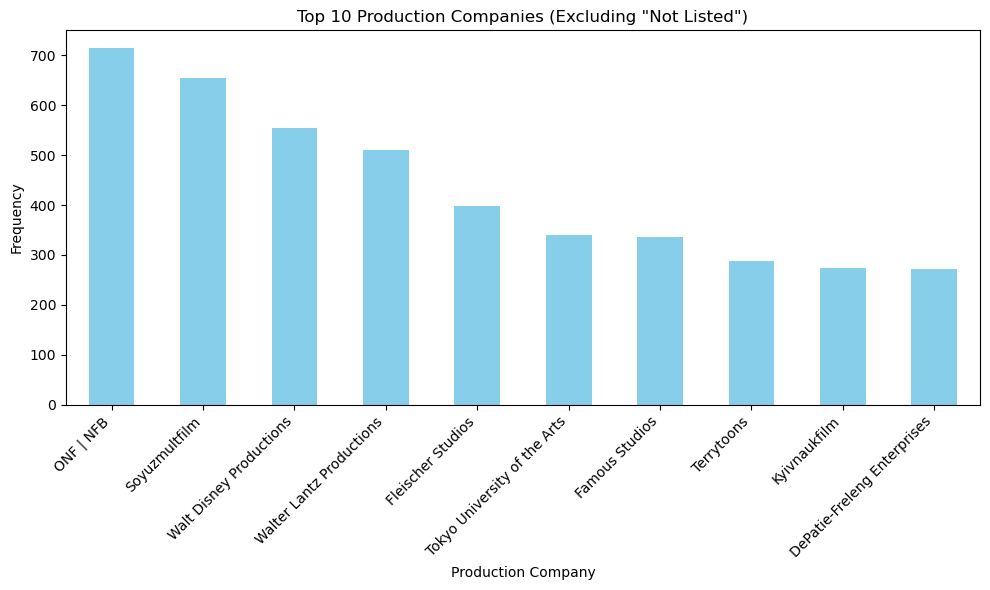

In [33]:
# Filter out "not listed" values from production_companies column
filtered_df = df[df['production_companies'] != 'not listed']

# Count occurrences of each production company
production_counts = filtered_df['production_companies'].value_counts()

# Select the top 10 production companies
top_10_production = production_counts.head(10)

# Plot the frequencies of the top 10 production companies
plt.figure(figsize=(10, 6))
top_10_production.plot(kind='bar', color='skyblue')
plt.title('Top 10 Production Companies (Excluding "Not Listed")')
plt.xlabel('Production Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

There are a lot of titles with missing values of production companies. Disregarding the missing fields, majority of the titles come from ONF which is a canadian production company followed by Souzmultifilm and Walt Disney in third.

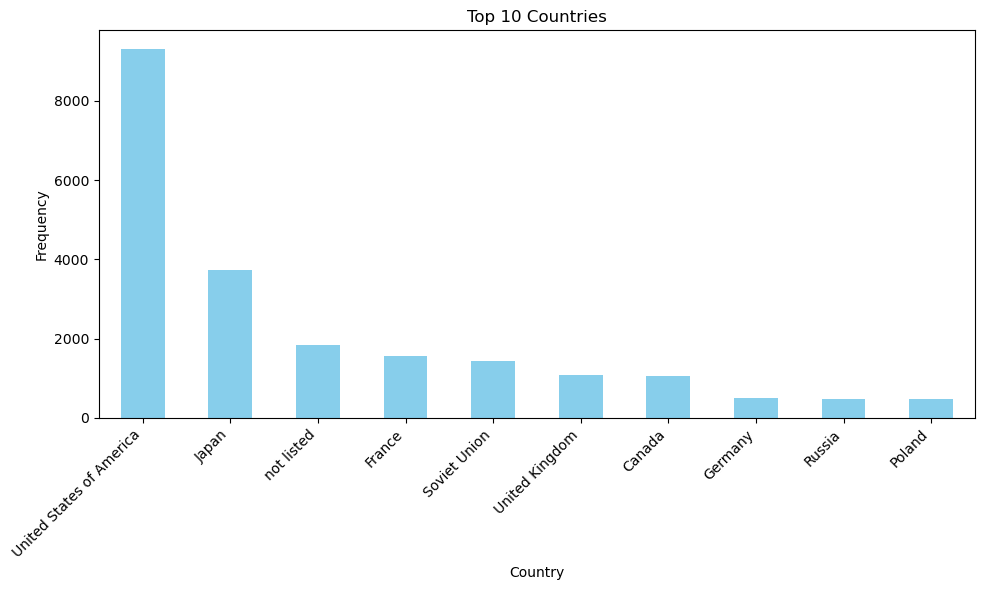

In [34]:
# Filter out "not listed" values from production_countries column
filtered_df2 = df[df['production_companies'] != 'not listed']

#looking at top 10 countries
top_10_countries = filtered_df2['production_countries'].value_counts().head(10)

# Plot the frequencies of the top 10 countries
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Also disregarding missing values, US followed by japan make the top 2 production countries. 

In [36]:
#saving updated df to CSV, name the new csv file 
new_file_path = 'Animated_movies_updated.csv'

# Save the DataFrame to the new CSV file 
df.to_csv(new_file_path, index=False)